In [1]:
# Lab 2 with solutions

# NOTE: climate variables are given from climatological gridded data (CRU) provided for the whole globe on ca 50x50 km grid
#
# Variables:
#                       g: [1x136 double]  Glacier annual mass balance gradient (Δb/Δz) =  annual average over the observed period [units: mm water equivalent per meter]
#        median_elevation: [1x136 double]  Median glacier elevation = derived from a distibution of glacier's area against elevation [units: m above sea level]
#      summer_temperature: [1x136 double]  Summer near-surface air temperature = as an average over a grid cell (~50x50 km) covering the glacier (averaged over the observed period) [units: degree C]
#           precipitation: [1x136 double]  Total annaul precipitation = as an average over a grid cell covering the glacier (averaged over the observed period) [units: mm per year]
#                     lat: [1x136 double]  Geographical latitude of the glacier [units: degrees North]
#           max_elevation: [1x136 double]  Maximum glacier elevation [units: m above sea level]
#                 WGMS ID: [1x136 int64]   Given glacier ID (from World Glacier Monitoring Service)
#    winter_precipitation: [1x136 double]  Average winter precipitation = as an average over a grid cell covering the glacier (winter season corresponds to accumulation season) [units: mm per month]
#                     lon: [1x136 double]  Geographical longitude of the glacier [units: degrees East]
#             cloud_cover: [1x136 double]  Annual cloud cover = as an average over a grid cell covering the glacier (averaged over the observed period) [units: %]
#          continentality: [1x136 double]  Continentality index = maximum monthly temperature minus minimum monthly temperature over a year (averaged over a grid cell covering the glacier and averaged over the observed period) [units: degrees C]

#   Note: The larger the continentality index, the more continental (rather than maritime) the climate.  ure over a year (over a grid cell covering the glacier and averaged over the observed period). The larger the continentality index the climate is more continental (rather than maritime). 



In [2]:
#import all required libraries etc

from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import itertools

In [3]:
#run notebook with functions we'll need

%run ./Lab2_2020_functions.ipynb

In [4]:
#load the data and check it out

data = pd.read_csv('glaciers.csv')
data.head()

,g,median_elevation,summer_temperature,precipitation,lat,max_elevation,winter_precipitation,lon,cloud_cover,continentality
0,8.102728,1071.00,7.626667,483.990,-54.78,1172.5,36.273333,-68.40,63.393750,8.395
1,1.860170,2660.00,11.663333,1637.810,47.04,2950.0,91.578333,12.97,61.731667,18.830
2,9.194071,2560.00,14.881667,1521.845,47.48,2910.0,83.785000,13.62,61.529583,20.045
3,4.162200,3039.75,11.683333,1550.760,46.80,3715.5,93.790000,10.77,62.957083,18.725
4,4.411077,2795.00,10.561667,1726.480,46.85,3140.0,110.065000,10.15,64.265417,17.855


In [5]:
#clean data -- g<0 is non physical and this data point should be removed
data = data[data["g"]>0].reset_index(drop=True) 
### data["g"]>0 generates a series containing "True" and "False" used to index data 
                                   ### and remove "False" entries

In [6]:
data

,g,median_elevation,summer_temperature,precipitation,lat,max_elevation,winter_precipitation,lon,cloud_cover,continentality
0,8.102728,1071.000000,7.626667,483.990,-54.78,1172.500000,36.273333,-68.40,63.393750,8.395
1,1.860170,2660.000000,11.663333,1637.810,47.04,2950.000000,91.578333,12.97,61.731667,18.830
2,9.194071,2560.000000,14.881667,1521.845,47.48,2910.000000,83.785000,13.62,61.529583,20.045
3,4.162200,3039.750000,11.683333,1550.760,46.80,3715.500000,93.790000,10.77,62.957083,18.725
4,4.411077,2795.000000,10.561667,1726.480,46.85,3140.000000,110.065000,10.15,64.265417,17.855
5,6.880925,3183.333333,11.683333,1550.760,46.83,3491.000000,93.790000,10.79,62.957083,18.725
6,6.901791,2845.000000,11.663333,1637.810,47.05,3080.000000,91.578333,12.95,61.731667,18.830
7,5.220000,2910.000000,11.683333,1550.760,46.78,3420.000000,93.790000,11.01,62.957083,18.725
8,5.717323,2760.000000,10.028333,1662.105,47.11,3585.000000,94.943333,12.29,62.970833,18.260
9,5.466395,2910.000000,10.561667,1726.480,46.85,3160.000000,110.065000,10.10,64.265417,17.855


In [7]:
#normalize data and check it out

data_norm = (data - data.mean())/data.std()
data_norm.head()

,g,median_elevation,summer_temperature,precipitation,lat,max_elevation,winter_precipitation,lon,cloud_cover,continentality
0,0.729295,-1.127617,-0.610002,-1.008986,-4.510634,-1.305564,-0.826765,-0.917411,-0.073330,-1.567918
1,-1.252792,0.077903,0.303656,0.634920,-0.009790,0.000761,0.080425,0.221562,-0.285946,-0.270948
2,1.075809,0.002036,1.032093,0.469699,0.009659,-0.028636,-0.047412,0.230660,-0.311797,-0.119936
3,-0.521870,0.366006,0.308183,0.510896,-0.020399,0.563344,0.116703,0.190768,-0.129189,-0.283999
4,-0.442849,0.180323,0.054305,0.761253,-0.018189,0.140396,0.383669,0.182089,0.038174,-0.392131


Text(0.5, 1.0, 'Visualizing Normalization')

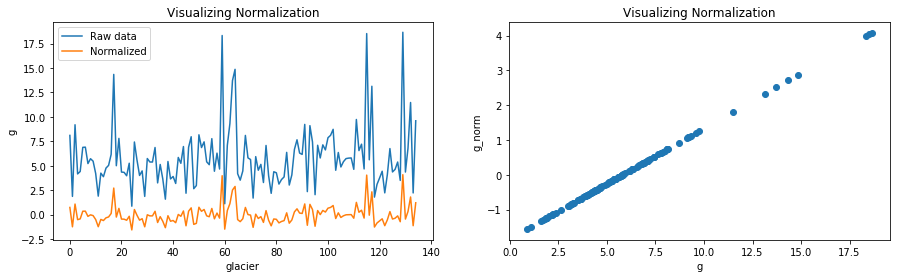

In [8]:
#visualize normalization

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.plot(data['g'])
plt.plot(data_norm['g'])
plt.legend(['Raw data','Normalized'])
plt.ylabel('g')
plt.xlabel('glacier')
plt.title('Visualizing Normalization')

plt.subplot(1,2,2)
plt.scatter(data['g'],data_norm['g'])
plt.ylabel('g_norm')
plt.xlabel('g')
plt.title('Visualizing Normalization')

In [9]:
#unpack normalized data
lat = data_norm['lat']
lon = data_norm['lon']
hmax = data_norm['max_elevation']
hmed = data_norm['median_elevation']
g = data['g']   # response variable does not need to be standardized 
Pannual = data_norm['precipitation']
Pwinter = data_norm['winter_precipitation']
CI = data_norm['continentality']
cloud = data_norm['cloud_cover']
Tsummer = data_norm['summer_temperature']

In [10]:
#target variable: y; predictor variable(s): x

y = g
X = data_norm.drop('g',axis=1)

SOLUTIONS:

1) Apply MLR to standardized input

In [11]:
#make MLR model, fit to the data, and predict y

lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,y)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,y) #R-squared value from MLR model

Text(0.5, 1.0, 'MLR Model Results: R^2 = 0.38')

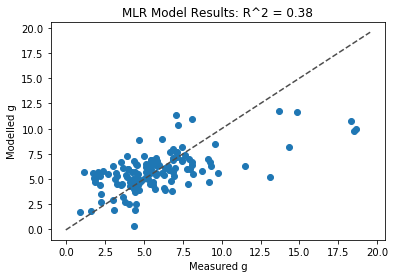

In [12]:
#visualize MLR model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_MLR)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g')
plt.ylabel('Modelled g')
plt.title('MLR Model Results: R^2 = ' + str(R2_MLR)[:4])

2) Apply stepwise regression on standardized input

In [13]:
#use stepwise regression to find which predictors to use

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  continentality                 with p-value 3.75066e-10
resulting features:
['continentality']


/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


In [14]:
#do MLR using predictors chosen from stepwise regression

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],y)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],y) #R-squared value from MLR model

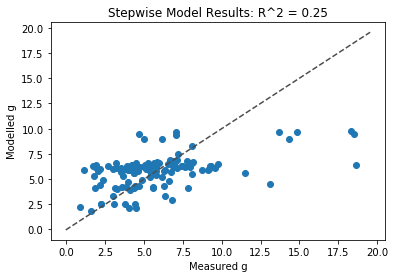

In [15]:
#visualize stepwise model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_step)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g')
plt.ylabel('Modelled g')
plt.title('Stepwise Model Results: R^2 = ' + str(R2_step)[:4])
plt.show()

Apply calibration - validation approach on standardized input

In [16]:
#goal: loop through every combination of normalized predictors, make linear model, and find one with best performance

R2_best = []
combo_best = []

for kk in range(1,10): #for each total number of predictors to use in model (from 1 predictor to 9 predictors)
    
    v0 = range(np.shape(X)[1])
    combinations = list(itertools.combinations(range(np.shape(X)[1]),kk)) #all possible combinations of kk total predictors 
    R2_test = []
    
    for ind in range(len(combinations)): #for each combination of predictors, make MLR model and compute R^2

        test_vars = np.array(combinations[ind])
        X_test = X.iloc[::2,test_vars]  # calibation sample consists of all odd indices in the data
        y_test = y.iloc[::2]
        
        X_valid = X.iloc[1::2,test_vars]  # validation sample consists of all even indices in the data
        y_valid = y.iloc[1::2]

        lm_test = linear_model.LinearRegression()
        model_test = lm_test.fit(X_test,y_test)
        ypred_test = lm_test.predict(X_test) #y predicted by MLR
        R2_test.append(lm_test.score(X_valid,y_valid)) #R-squared value from MLR model

    R2_best.append(np.max(R2_test))
    combo_best.append(combinations[np.argmax(R2_test)])
    
R2_best_final = np.max(R2_best)
combo_best_final = combo_best[np.argmax(R2_best)]

print('The best combination of predictors is: ' )
print(list(X.columns[np.asarray(combo_best_final)]))

The best combination of predictors is: 
['median_elevation', 'lat', 'max_elevation', 'cloud_cover']


In [17]:
#build linear model using the best combination of predictors

X_calib_valid = X.iloc[:,np.asarray(combo_best_final)]

lm_calib_valid = linear_model.LinearRegression()
model_calib_valid = lm_calib_valid.fit(X_calib_valid,y)
ypred_calib_valid = lm_calib_valid.predict(X_calib_valid) #y predicted by MLR
intercept_calib_valid = lm_calib_valid.intercept_ #intercept predicted by MLR
coef_calib_valid = lm_calib_valid.coef_ #regression coefficients in MLR model
R2_calib_valid = lm_calib_valid.score(X_calib_valid,y) #R-squared value from MLR model

Text(0.5, 1.0, 'Calibration-Validation Model Results: R^2 = 0.32')

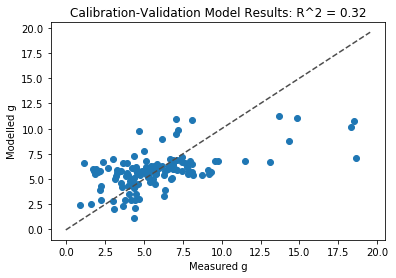

In [18]:
#visualize calibration-validation model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_calib_valid)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g')
plt.ylabel('Modelled g')
plt.title('Calibration-Validation Model Results: R^2 = ' + str(R2_calib_valid)[:4])

In [ ]:
#Answers to the specific questions:

# 1) How well can the spatial variability in mass balance gradient be represented 
# by a multiple linear regression (MLR) using all the plausible predictors from the given dataset? 
# Answer: R^2 is a metric of the goodness of the fit, which is the same as correlation 
# coefficient squared.  In this case, R^2 = 0.38 (38% variance is expained by the MLR model)

#2) What is the optimal number of predictors in MLR and how much variance in the mass balance gradient
# can be explained by this MLR?
# Answers: According to the stepwise regression there is only one optimal predictor : CI (continentality index)
# With this one predictor, the model explains 25% of the variance (R^2 = 0.25)
# According to the calibration-validation approach optimal number of preditors is 4: latitude, max elevation, median elevation, cloud cover
# With this four-predictor model R^2 = 0.32 (32% variance is explained)

# 3) Plot modelled (regressed) mass balance gradients versus observed ones on a scatter plot (with 1:1 line) 
# and discuss whether the linear model represents a good fit to the data or not.  
# The plots are provided and no obvius outliers are indicated in the scatter plot
# There seems to be a tendency for the model (in all three cases above) to 
# underestimate mass balance gradients that are larger then 10 mm w.e. per m